In [44]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import os

In [66]:
current_ADC = []
current_multimeter = []

voltage_ADC = []
voltage_multimeter = []

if (os.path.exists("data_voltage.csv")):
    os.remove("data_voltage.csv")
if (os.path.exists("data_current.csv")):
    os.remove("data_current.csv")

In [65]:
voltage_ADC.append(float(input("Masukkan data ADC tegangan : ")))
voltage_multimeter.append(float(input("Masukkan data tegangan terbaca di multimeter : ")))

with open('data_voltage.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Voltage_ADC", "Voltage_multimeter"])
    for i in range(len(voltage_ADC)):
        csvwriter.writerow([voltage_ADC[i], voltage_multimeter[i]])



fig, ax = plt.subplots(1, figsize=(12,5), dpi=150)
ax.scatter(voltage_ADC, voltage_multimeter, color='r', edgecolor='k')
ax.set_title("Voltage")

plt.legend()

ValueError: could not convert string to float: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


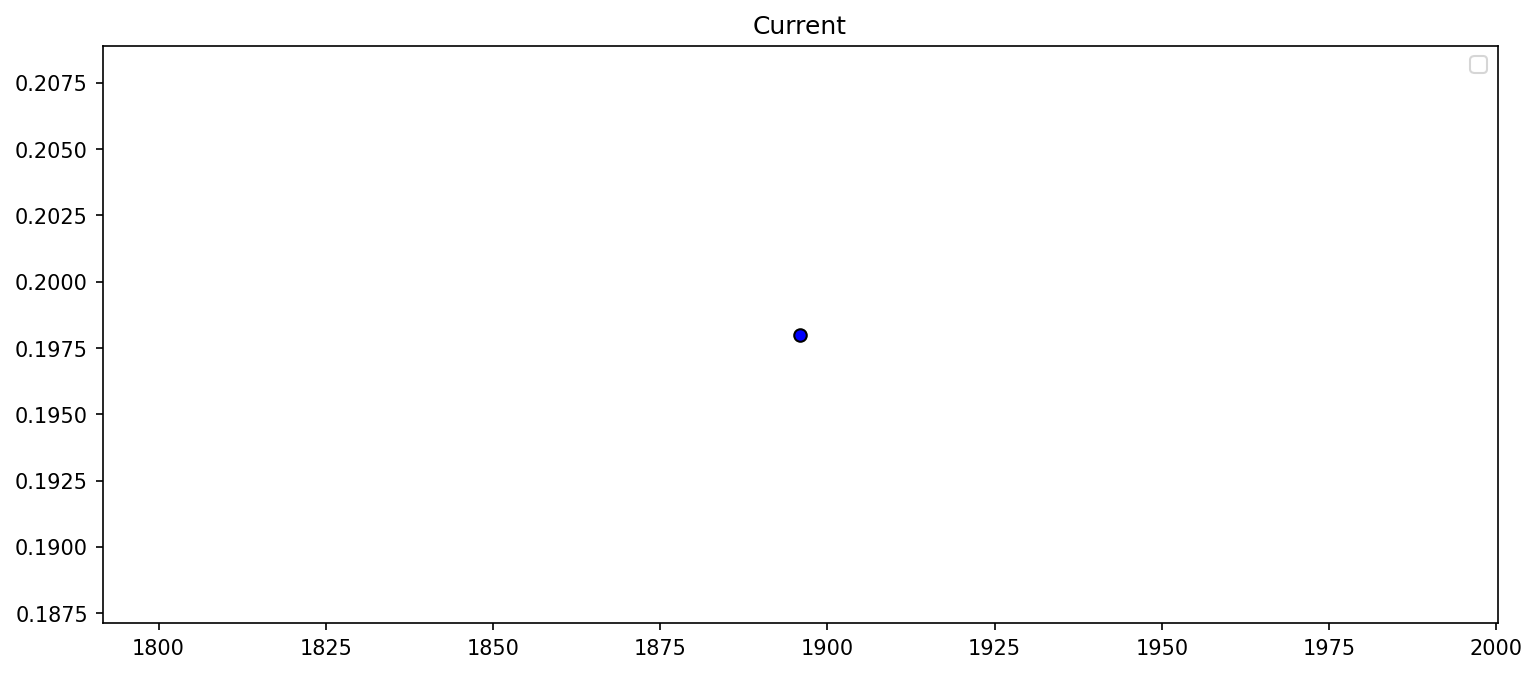

In [67]:
current_ADC.append(float(input("Masukkan data ADC arus : ")))
current_multimeter.append(float(input("Masukkan data arus : ")))

with open('data_current.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Current_ADC", "Current_multimeter"])
    for i in range(len(voltage_ADC)):
        csvwriter.writerow([current_ADC[i], current_multimeter[i]])



fig, ax = plt.subplots(1, figsize=(12,5), dpi=150)
ax.scatter(current_ADC, current_multimeter, color='b', edgecolor='k')
ax.set_title("Current")

plt.legend()

In [47]:
current_ADC = current_ADC[0:len(current_ADC)-1]
current_multimeter = current_multimeter[0:len(current_multimeter)-1]

def delete_row(csv_file, row_index):
    with open(csv_file, 'r') as file:
        lines = list(csv.reader(file))

    if row_index < len(lines):
        deleted_row = lines.pop(row_index)

        with open(csv_file, 'w', newline='') as file:
            csv.writer(file).writerows(lines)

        print(f"Deleted row: {deleted_row}")
    else:
        print("Invalid row index. Row not deleted.")


# Call the delete_row function to delete the specified row
delete_row("data_current.csv", len(current_ADC))

FileNotFoundError: [Errno 2] No such file or directory: 'data_current.csv'

In [36]:
voltage_ADC = voltage_ADC[0:len(voltage_ADC)-1]
voltage_multimeter = voltage_multimeter[0:len(voltage_multimeter)-1]

def delete_row(csv_file, row_index):
    with open(csv_file, 'r') as file:
        lines = list(csv.reader(file))

    if row_index < len(lines):
        deleted_row = lines.pop(row_index)

        with open(csv_file, 'w', newline='') as file:
            csv.writer(file).writerows(lines)

        print(f"Deleted row: {deleted_row}")
    else:
        print("Invalid row index. Row not deleted.")


# Call the delete_row function to delete the specified row
delete_row("data_voltage.csv", len(voltage_ADC))

Deleted row: ['1.0', '1.0', '1.0', '1.0']


In [ ]:
voltage_ADC = np.array(voltage_ADC)
voltage_multimeter = np.array(voltage_multimeter)
voltage_ADC = np.vstack([voltage_ADC, np.ones(len(voltage_ADC))]).T

b1, b0 = np.linalg.lstsq(voltage_ADC, voltage_multimeter, rcond=None)[0]
print(f"Voltage : b0 : {b0} | b1 : {b1} | y = {b1}x + {b0}")

In [61]:
current_ADC = np.array(current_ADC)
current_multimeter = np.array(current_multimeter)
current_ADC = np.vstack([current_ADC, np.ones(len(current_ADC))]).T

b1, b0 = np.linalg.lstsq(current_ADC, current_multimeter, rcond=None)[0]
print(f"Current : b0 : {b0} | b1 : {b1} | y = {b1}x + {b0}")

Current : b0 : -20.644128790066596 | b1 : 0.012171960727692851 | y = 0.012171960727692851x + -20.644128790066596


In [32]:
data_voltage = pd.read_csv("data_voltage.csv")
data_voltage.to_excel("data_voltage.xlsx", index=False)

[]

In [ ]:
data_current = pd.read_csv("data_current.csv")
data_current.to_excel("data_current.xlsx", index=False)